In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66311_Z')

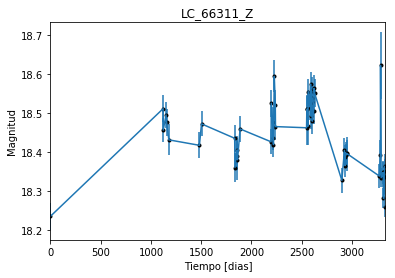

In [2]:
data = np.genfromtxt('LC_66311_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66311_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

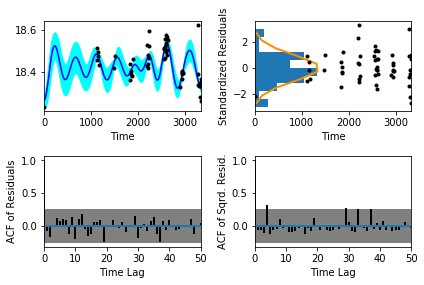

In [5]:
sample.assess_fit()

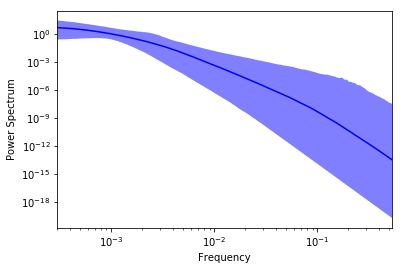

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66311_Z')

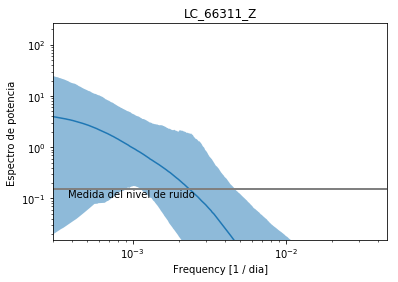

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66311_Z')

Text(0.5,1,'Prediccion , valor esperado LC_66311_Z')

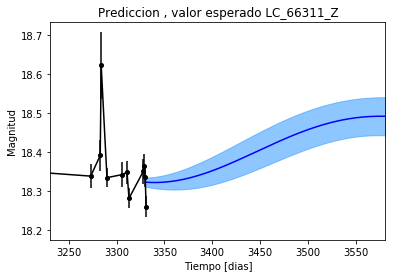

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66311_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66311_z')

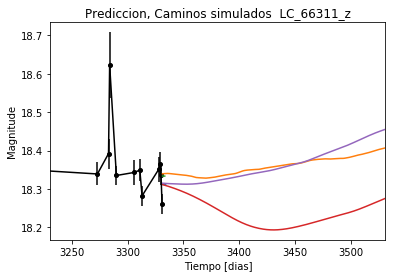

In [7]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66311_z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66311_Z')

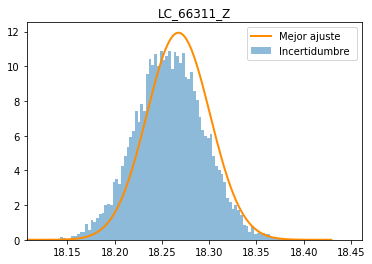

In [8]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66311_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_Z')

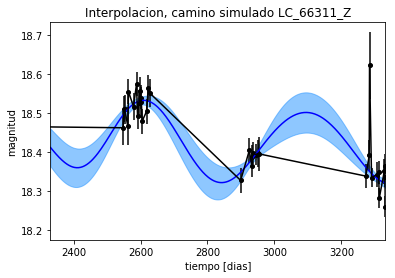

In [10]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_Z')

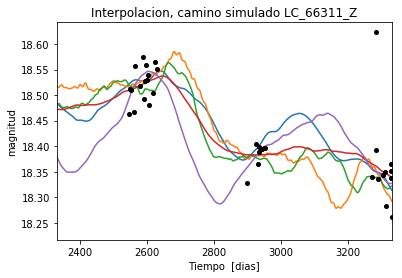

In [11]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_Z')

In [12]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [13]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 437.674818215
Median: 0.00944255954395
Standard deviation: 0.210097583547
68% credibility interval: [ 0.00066323  0.21529847]
95% credibility interval: [  3.38147407e-04   8.24076413e-01]
99% credibility interval: [  3.08342652e-04   9.98201866e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 695.320395816
Median: 0.00118428415745
Standard deviation: 0.0682834663798
68% credibility interval: [ 0.00040314  0.01380903]
95% credibility interval: [ 0.00031486  0.18487917]
99% credibility interval: [  3.02623546e-04   4.81976461e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 807.346012968
Median: 0.0168894104524
Standard

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2216.76707614
Median: 111.662575099
Standard deviation: 1.45779134991
68% credibility interval: [ 110.02351964  112.63954563]
95% credibility interval: [ 107.59949978  113.14941062]
99% credibility interval: [ 105.93183861  113.3278671 ]


In [15]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 722.415575488
Median: 0.641920831872
Standard deviation: 2.16509124427
68% credibility interval: [ 0.04934892  3.77232602]
95% credibility interval: [ 0.0135066   7.21072949]
99% credibility interval: [  9.79608857e-03   1.07417641e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 690.611977565
Median: 0.218335564892
Standard deviation: 7.78611954627
68% credibility interval: [ 0.006732    4.68112331]
95% credibility interval: [  4.4

In [16]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 512.652456913
Median: 1.22646140957e-24
Standard deviation: 1.67826993207e+35
68% credibility interval: [  3.20378743e-117   3.69111288e-007]
95% credibility interval: [  1.69817332e-169   2.79229300e+006]
99% credibility interval: [  3.14020410e-179   3.16086254e+020]


In [17]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1392.6238917
Median: 18.3998879242
Standard deviation: 0.0574086511424
68% credibility interval: [ 18.34425545  18.44342639]
95% credibility interval: [ 18.26830345  18.49420007]
99% credibility interval: [ 18.1947209   18.55722526]


In [18]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 345.629430225
Median: 0.000729521361757
Standard deviation: 0.210059217483
68% credibility interval: [ 0.          0.19528643]
95% credibility interval: [ 0.          0.82038487]
99% credibility interval: [ 0.          1.00519388]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 345.629430225
Median: 0.000729521361757
Standard deviation: 0.210059217483
68% credibility interval: [ 0.          0.19528643]
95% credibility interval: [ 0.          0.82038487]
99% credibility interval: [ 0.          1.00519388]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 585.293908782
Median: 0.0
Standard deviation: 0.000502999108623
68

In [19]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2216.76707614
Median: 111.662575099
Standard deviation: 1.45779134991
68% credibility interval: [ 110.02351964  112.63954563]
95% credibility interval: [ 107.59949978  113.14941062]
99% credibility interval: [ 105.93183861  113.3278671 ]


In [20]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2538.64959151
Median: 0.00922962128583
Standard deviation: 0.0140978050954
68% credibility interval: [ 0.00513187  0.01935126]
95% credibility interval: [ 0.00313719  0.04356863]
99% credibility interval: [ 0.00229582  0.07894934]


In [21]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2565.87956922
Median: 1.23957468149
Standard deviation: 0.187882763968
68% credibility interval: [ 1.07618987  1.43852905]
95% credibility interval: [ 0.93485274  1.67335454]
99% credibility interval: [ 0.85066404  1.8516325 ]


In [22]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3530.35412028
Median: 1.99244226699e-05
Standard deviation: 0.0259557069164
68% credibility interval: [  2.76611098e-07   9.46682806e-04]
95% credibility interval: [  1.58467196e-10   1.72731408e-02]
99% credibility interval: [  1.78342372e-24   1.31387127e-01]


In [23]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 437.674818215
Median: (-0.0593293513887-4.4361886109j)
Standard deviation: 1.86670749043
68% credibility interval: [-1.35276016 -5.52515376e+00j -0.00416721 -3.40633993e-03j]
95% credibility interval: [ -5.17782481e+00+0.j          -2.12464282e-03-0.01458823j]
99% credibility interval: [ -6.27188730e+00 -5.56472535e+00j  -1.93737402e-03 -3.16113596e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 695.320395816
Median: (-0.00744107681761+0.0101169419466j)
Standard deviation: 1.38782331751
68% credibility interval: [-0.08676470+0.10898407j -0.00253302+0.10426551j]
95% credibility interval: [-1.16163010+2.69363847j -0.00197832+0.j        ]
99% credibility interval: [ -3.02834742e+00+3.12985449j  -1.90143982e-03+1.006